In [29]:
import numpy as np
import pylab as plt
import networkx as nx

In [30]:
# map cell to cell, add circular cell to goal point
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]

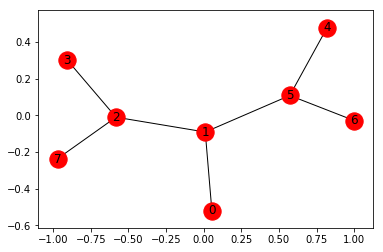

In [31]:
goal = 7

G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [32]:
MATRIX_SIZE = 8

R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

In [33]:
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0
        
    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        R[point[::-1]] = 0

R[goal, goal] = 100

R

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.]])

In [34]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))

gamma = 1.0

initial_state = 1
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state)

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act, 1))
    return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
    
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size =1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
    
    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_vale', R[current_state, action] + gamma * max_value)
    
    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)

update(initial_state, action, gamma)

max_vale 0.0


0

In [35]:
# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)


max_vale 0.0
Score: 0
max_vale 0.0
Score: 0
max_vale 0.0
Score: 0
max_vale 0.0
Score: 0
max_vale 0.0
Score: 0
max_vale 0.0
Score: 0
max_vale 0.0
Score: 0
max_vale 0.0
Score: 0
max_vale 0.0
Score: 0
max_vale 0.0
Score: 0
max_vale 0.0
Score: 0
max_vale 0.0
Score: 0
max_vale 100.0
Score: 100.0
max_vale 0.0
Score: 100.0
max_vale 0.0
Score: 100.0
max_vale 0.0
Score: 100.0
max_vale 0.0
Score: 100.0
max_vale 0.0
Score: 100.0
max_vale 200.0
Score: 100.0
max_vale 0.0
Score: 100.0
max_vale 0.0
Score: 100.0
max_vale 0.0
Score: 100.0
max_vale 0.0
Score: 100.0
max_vale 0.0
Score: 100.0
max_vale 300.0
Score: 100.0
max_vale 0.0
Score: 100.0
max_vale 0.0
Score: 100.0
max_vale 0.0
Score: 100.0
max_vale 0.0
Score: 100.0
max_vale 0.0
Score: 100.0
max_vale 0.0
Score: 100.0
max_vale 0.0
Score: 100.0
max_vale 0.0
Score: 100.0
max_vale 0.0
Score: 100.0
max_vale 400.0
Score: 100.0
max_vale 0.0
Score: 100.0
max_vale 500.0
Score: 100.0
max_vale 0.0
Score: 100.0
max_vale 0.0
Score: 100.0
max_vale 0.0
Score: 100.

max_vale 4700.0
Score: 1434.0425531914896
max_vale 4400.0
Score: 1434.0425531914896
max_vale 4700.0
Score: 1436.1702127659576
max_vale 4800.0
Score: 1408.3333333333333
max_vale 4400.0
Score: 1408.3333333333333
max_vale 4800.0
Score: 1410.4166666666665
max_vale 4700.0
Score: 1410.4166666666665
max_vale 4700.0
Score: 1410.4166666666665
max_vale 4800.0
Score: 1412.5
max_vale 4800.0
Score: 1412.5
max_vale 4800.0
Score: 1412.5
max_vale 4800.0
Score: 1420.8333333333333
max_vale 4800.0
Score: 1435.4166666666665
max_vale 4800.0
Score: 1435.4166666666665
max_vale 4800.0
Score: 1435.4166666666665
max_vale 4800.0
Score: 1437.4999999999998
max_vale 4800.0
Score: 1445.833333333333
max_vale 4800.0
Score: 1445.833333333333
max_vale 4800.0
Score: 1447.9166666666665
max_vale 4800.0
Score: 1447.9166666666665
max_vale 4800.0
Score: 1447.9166666666665
max_vale 4800.0
Score: 1447.9166666666665
max_vale 4800.0
Score: 1447.9166666666665
max_vale 4800.0
Score: 1447.9166666666665
max_vale 4800.0
Score: 1456.24

max_vale 6300.0
Score: 1407.2463768115942
Trained Q matrix:
[[  0.          91.30434783   0.           0.           0.
    0.           0.           0.        ]
 [ 91.30434783   0.          98.55072464   0.           0.
   91.30434783   0.           0.        ]
 [  0.          91.30434783   0.          91.30434783   0.
    0.           0.          98.55072464]
 [  0.           0.          98.55072464   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   91.30434783   0.           0.        ]
 [  0.          91.30434783   0.           0.          91.30434783
    0.          91.30434783   0.        ]
 [  0.           0.           0.           0.           0.
   91.30434783   0.           0.        ]
 [  0.           0.          98.55072464   0.           0.
    0.           0.         100.        ]]


Most efficient path:
[0, 1, 2, 7]


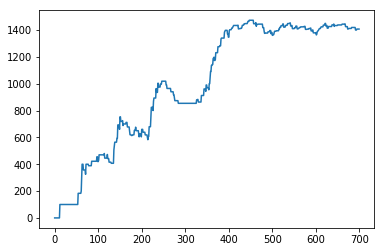

In [36]:
# Testing
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()